In [1]:
import numpy as np
import matplotlib.pyplot as plt
from docplex.mp.model import Model

In [2]:
n=50
cities=[i for i in range(n)]
edges =[(i,j) for i in cities for j in cities if i!=j]

In [3]:
random=np.random
random.seed(1)
coord_x=random.rand(n)*100
coord_y=random.rand(n)*100

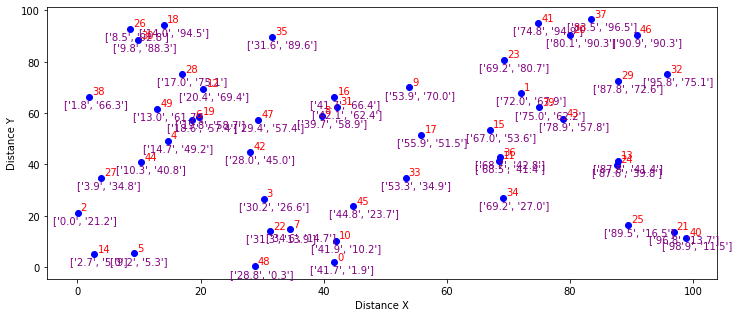

In [4]:
x=coord_x
y=coord_y

plt.figure(figsize=(12,5))
plt.scatter(x,y,color='blue')
s=[]
for n in range(len(coord_x)):
    s_temp=[]
    s_temp.append("%.1f" %coord_x[n])
    s_temp.append("%.1f" %coord_y[n])
    s.append(s_temp)

plt.xlabel("Distance X")
plt.ylabel("Distance Y")

for n in range(len(coord_x)):
    plt.annotate(str(s[n]), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]-4,coord_y[n]-4), 
                 color='purple')
    
for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]+0.5,coord_y[n]+1),
                 color='red')

plt.show()

In [5]:
distances={(i, j): np.hypot(coord_x[i] - coord_x[j], coord_y[i] - coord_y[j]) for i,j in edges}

In [6]:
mdl=Model('TSP')


In [7]:
x = mdl.binary_var_dict(edges,name='x')
u = mdl.continuous_var_dict(cities,name='u')

In [8]:
mdl.minimize(mdl.sum(distances[i]*x[i] for i in edges))

In [9]:
for c in cities:
    mdl.add_constraint(
        mdl.sum(x[(i,j)] for i,j in edges if i==c) == 1, 
        ctname='out_%d'%c
    )
for c in cities:
    mdl.add_constraint(
        mdl.sum(x[(i,j)] for i,j in edges if j==c) == 1, 
        ctname='in_%d'%c
    )

for i,j in edges:
    if j!=0:
        mdl.add_indicator(
            x[(i,j)],
            u[i] + 1 == u[j], 
            name='order_(%d,_%d)'%(i, j)
        )

In [10]:
mdl.parameters.timelimit=120
mdl.parameters.mip.strategy.branch=1
mdl.parameters.mip.tolerances.mipgap=0.15

solution = mdl.solve(log_output=True)

Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              202001241
CPXPARAM_MIP_Strategy_Branch                     1
CPXPARAM_TimeLimit                               120
CPXPARAM_MIP_Tolerances_MIPGap                   0.14999999999999999
Tried aggregator 2 times.
MIP Presolve modified 1176 coefficients.
Aggregator did 1176 substitutions.
Reduced MIP has 1325 rows, 3725 columns, and 8575 nonzeros.
Reduced MIP has 2450 binaries, 0 generals, 0 SOSs, and 2401 indicators.
Presolve time = 0.01 sec. (15.89 ticks)
Probing time = 0.01 sec. (10.80 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 1325 rows, 3725 columns, and 8575 nonzeros.
Reduced MIP has 2450 binaries, 0 generals, 0 SOSs, and 2401 indicators.
Presolve time = 0.01 sec. (6.30 ticks)
Probing time = 0.00 sec. (3.25 ticks)
Clique table members: 1276.
MIP emphasis: balance optimality and feasibility.
MIP search met

In [11]:
mdl.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [12]:
solution.display()

solution for: TSP
objective: 629.825
x_0_10 = 1
x_1_39 = 1
x_2_14 = 1
x_3_45 = 1
x_4_44 = 1
x_5_48 = 1
x_6_19 = 1
x_7_22 = 1
x_8_47 = 1
x_9_16 = 1
x_10_7 = 1
x_11_34 = 1
x_12_28 = 1
x_13_43 = 1
x_14_5 = 1
x_15_36 = 1
x_16_31 = 1
x_17_15 = 1
x_18_26 = 1
x_19_12 = 1
x_20_37 = 1
x_21_40 = 1
x_22_3 = 1
x_23_9 = 1
x_24_13 = 1
x_25_21 = 1
x_26_30 = 1
x_27_2 = 1
x_28_42 = 1
x_29_46 = 1
x_30_38 = 1
x_31_8 = 1
x_32_29 = 1
x_33_17 = 1
x_34_25 = 1
x_35_18 = 1
x_36_11 = 1
x_37_23 = 1
x_38_49 = 1
x_39_32 = 1
x_40_24 = 1
x_41_20 = 1
x_42_4 = 1
x_43_1 = 1
x_44_27 = 1
x_45_33 = 1
x_46_41 = 1
x_47_35 = 1
x_48_0 = 1
x_49_6 = 1
u_1 = 18.000
u_2 = 46.000
u_3 = 4.000
u_4 = 43.000
u_5 = 48.000
u_6 = 38.000
u_7 = 2.000
u_8 = 30.000
u_9 = 27.000
u_10 = 1.000
u_11 = 10.000
u_12 = 40.000
u_13 = 16.000
u_14 = 47.000
u_15 = 8.000
u_16 = 28.000
u_17 = 7.000
u_18 = 33.000
u_19 = 39.000
u_20 = 24.000
u_21 = 13.000
u_22 = 3.000
u_23 = 26.000
u_24 = 15.000
u_25 = 12.000
u_26 = 34.000
u_27 = 45.000
u_28 = 41.000
u_29 =

In [13]:
active_edges = [a for a in edges if x[a].solution_value > 0.9]
print(active_edges)

[(0, 10), (1, 39), (2, 14), (3, 45), (4, 44), (5, 48), (6, 19), (7, 22), (8, 47), (9, 16), (10, 7), (11, 34), (12, 28), (13, 43), (14, 5), (15, 36), (16, 31), (17, 15), (18, 26), (19, 12), (20, 37), (21, 40), (22, 3), (23, 9), (24, 13), (25, 21), (26, 30), (27, 2), (28, 42), (29, 46), (30, 38), (31, 8), (32, 29), (33, 17), (34, 25), (35, 18), (36, 11), (37, 23), (38, 49), (39, 32), (40, 24), (41, 20), (42, 4), (43, 1), (44, 27), (45, 33), (46, 41), (47, 35), (48, 0), (49, 6)]


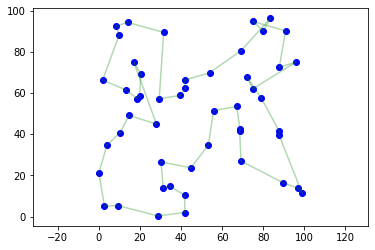

In [16]:
plt.scatter(coord_x, coord_y, c='b')
# for i in cities:
#     plt.annotate('$q_%d=%d$' % (i, q[i]), (coord_x[i]+2, coord_y[i]))
for i, j in active_edges:
    plt.plot([coord_x[i], coord_x[j]], [coord_y[i], coord_y[j]], c='g', alpha=0.3)

plt.axis('equal');